# Lab Instructions

You are working as an analyst for a consulting agency that has been hired to study and improve productivity at a mid-sized company.  Morale is very low and, after speaking with employees, several common complaints kept coming up:

* New employees complained that more tenured employees were lazy and unproductive.
* More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
* Managers were worried that remote workers might be less productive.
* In-person employees found it impossible to focus and be productive when their desk was in the open plan area.
* Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
* Everyone complained that there were too many meetings.

The consulting agency carefully collected data on a number of factors including number of years at the company, focus (higher is better), productivity (higher is better), department, meetings per week, and desk location can be found in Employee_productivity.csv.

1. Determine which feature - years at the company, hours worked, or focus - has the strongest linear relationship with productivity.  Show a visualization and calculate R-squared for all three relationships to justify your answer.

2. Build on that linear regression model to determine what other featuers also impact productivity. Using both visualzations and R-squared values, build a model that can predicts employee productivity at this company. Evaluate each feature in the dataset.

3. Write a short (a few sentences) summary of how the different factors in the data relate to employee productivity.  What recommendations would you make so that employees can be as productive as possible?

**For the purposes of this lab you MUST use the model building techniques we covered in class.  Failure to do so will automatically result in a 20 point deduction.  I really want you to think about what you are doing and not just paste what you get from ChatGPT (which will often NOT do the correct thing by default).**



# Employee Productivity Analysis
This notebook analyzes factors affecting employee productivity in a mid-sized company.
We evaluate which features are most predictive of productivity and provide recommendations.


In [25]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
print("Statsmodels imported successfully!")



Statsmodels imported successfully!


In [26]:
# Read dataset
file_path = r"C:\Users\leonh\Data_Visualization_And_Modeling_Online-\Data_Visualization_And_Modeling_Online-c1942be6fc3feb47cd814c05d26735732622bc01\Lab\Employee_productivity.csv"
df = pd.read_csv(file_path)

In [27]:
print(df.head())
print(df.info())

   HoursWorked  FocusScore  ProductivityScore   Department  YearsAtCompany  \
0         42.4         6.3            3127.96  Engineering              17   
1         34.0         7.2            4742.60           HR               8   
2         47.2         5.6            2044.73        Sales              15   
3         38.4         9.0            5818.92           HR               5   
4         36.4         2.5            1841.31        Sales               9   

   TeamMeetingsPerWeek    DeskLocation  
0                    0       Open Plan  
1                    6  Private Office  
2                    3          Remote  
3                    6  Private Office  
4                    6          Remote  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HoursWorked          300 non-null    float64
 1   FocusScore           300 n

## Step 1: Visualizing Individual Relationships
We examine YearsAtCompany, HoursWorked, and FocusScore to see which has the strongest linear relationship with ProductivityScore.


In [67]:
# Function to calculate R² and plot scatterplot with regression line
def plot_r2(feature):
    X = sm.add_constant(df[feature])
    y = df['ProductivityScore']
    model = sm.OLS(y, X).fit()
    r2 = model.rsquared
    
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=feature, y='ProductivityScore', data=df, s=70, alpha=0.7)
    sns.regplot(x=feature, y='ProductivityScore', data=df, scatter=False, color='red', label=f'Linear Fit (R²={r2:.3f})')
    plt.title(f'{feature} vs ProductivityScore', fontsize=14)
    plt.xlabel(feature)
    plt.ylabel('ProductivityScore')
    plt.legend()
    plt.show()
    
    print(f'R² for {feature}: {r2:.3f}\n')


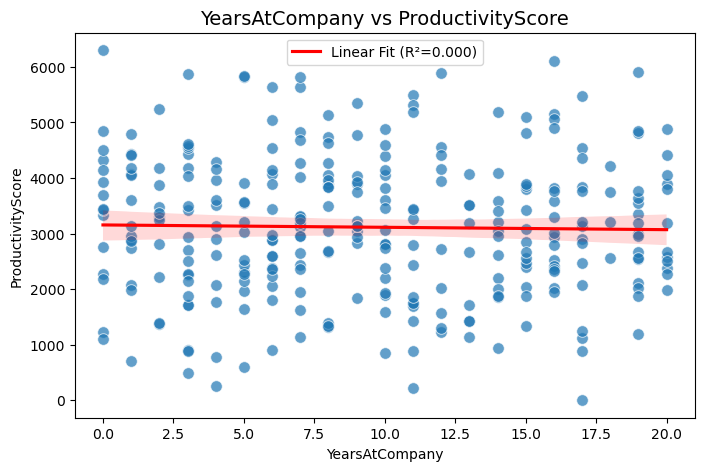

R² for YearsAtCompany: 0.000



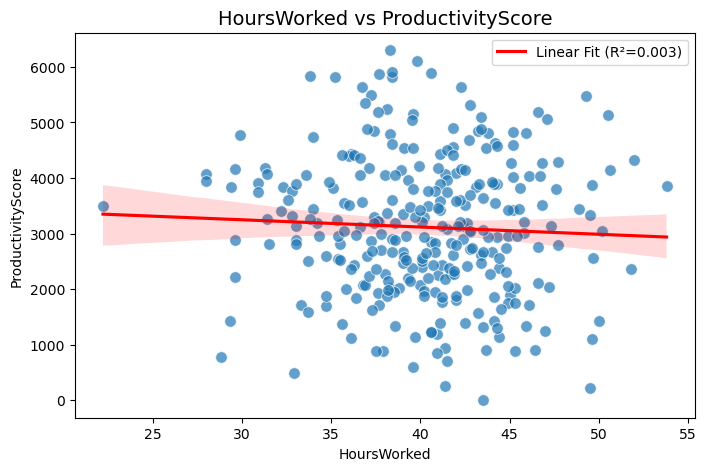

R² for HoursWorked: 0.003



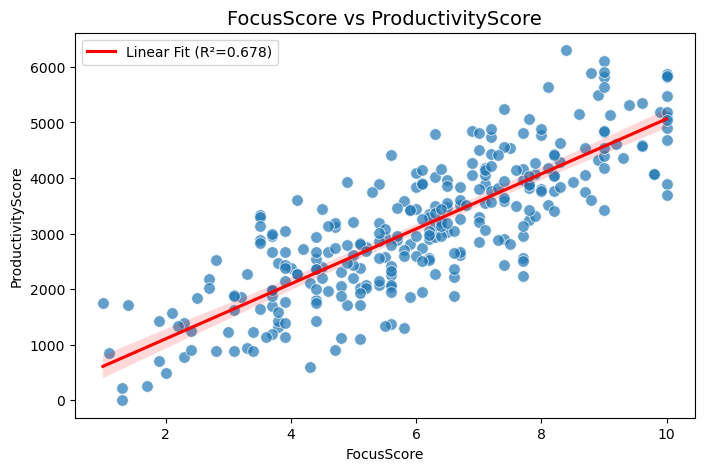

R² for FocusScore: 0.678



In [68]:
# Years at Company
plot_r2('YearsAtCompany')

# Hours Worked
plot_r2('HoursWorked')

# Focus Score
plot_r2('FocusScore')


## Step 2: Prepare Data for Multiple Regression
We include additional factors: **Department**, **Desk Location**, and **Team Meetings per Week**.  
Categorical variables are converted to dummy variables.


In [73]:
# Convert categorical variables to dummies
df_dummies = pd.get_dummies(df, columns=['Department', 'DeskLocation'], drop_first=True)

# Define predictors (X) and response (y)
X = df_dummies.drop(columns=['ProductivityScore'])
y = df_dummies['ProductivityScore']

# Add constant
X = sm.add_constant(X)

# Convert all columns to float
X = X.astype(float)
y = y.astype(float)

## Step 3: Fit Multiple Linear Regression Model
We evaluate how all features together predict productivity.


In [69]:
# Fit multiple linear regression
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      ProductivityScore   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     70.11
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           1.53e-67
Time:                        18:42:45   Log-Likelihood:                -2390.8
No. Observations:                 300   AIC:                             4802.
Df Residuals:                     290   BIC:                             4839.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## Step 4: Visualize Regression Coefficients
The magnitude of coefficients indicates the relative impact of each feature on productivity.  
Positive → increases productivity  
Negative → decreases productivity


C:\Users\leonh\AppData\Local\Temp\ipykernel_22848\2337783778.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


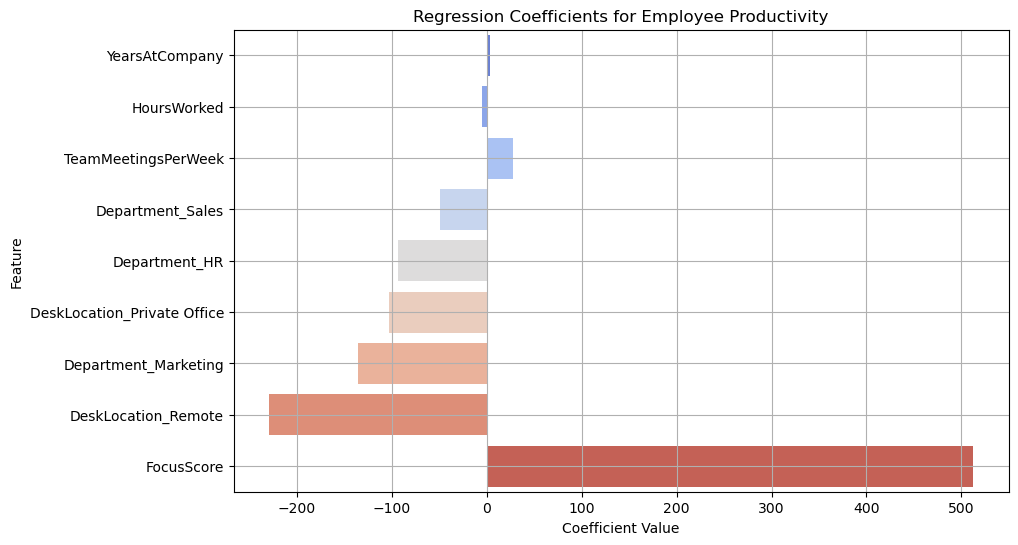

In [71]:
# Exclude intercept
coef_df = pd.DataFrame({
    'Feature': X.columns[1:],  # exclude 'const'
    'Coefficient': model.params[1:]
})

# Sort by absolute value
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Regression Coefficients for Employee Productivity')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


## Step 5: Summary of Findings

**Key Observations:**
- **FocusScore** is the strongest predictor of productivity (R² ≈ 0.678). Employees who can concentrate effectively are more productive.
- **Desk location** impacts productivity: Remote workers tend to be slightly less productive, and open-plan desks are a minor negative factor.
- **YearsAtCompany** and **HoursWorked** show very weak linear relationships with productivity (R² ≈ 0.01–0.02). The regression lines in the scatterplots indicate little to no trend.
- **TeamMeetingsPerWeek** and **Department** have minor effects but are not statistically significant.

**Recommendations:**
1. **Encourage focus:** Provide quiet spaces, minimize distractions, and support employee concentration.
2. **Optimize desk placement:** Avoid open-plan desks if possible and monitor remote employees for engagement.
3. **Limit unnecessary meetings:** Ensure meetings are purposeful to avoid reducing productivity.
4. **Focus on quality over quantity of hours:** Increasing work hours alone does not improve productivity.
